### Decision tree

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
 الگوریتم ساخت درخت تصمیم به صورت زیر میباشد:
<ol>
<li>
یک ویژگی انتخاب می شود و داده‌ها بر اساس یک شرط روی آن ویژگی تقسیم می‌شوند. بهترین ویژگی، ویژگی‌ای است که داده‌ها را به بهترین شکل تقسیم می‌کند.
</font></div>

<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<b><i>
 ID3 الگوریتم
</i></b>
</font></div>
<p></p>
<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در ادامه‌ی این نوشته به بررسی الگوریتم ID3 که یک الگوریتم پایه‌ای برای ساخت درخت تصمیم است می‌پردازیم.
<h3>بهره‌ی اطلاعاتی</h3>
 برای تعیین رسیدن به برگ‌های درخت نیاز به بررسی این موضوع داریم که آیا داده‌های یک گره به‌اندازه‌ی کافی یکدست شده‌اند یا خیر. در الگوریتم ID3 برای این کار از معیار بهره‌ی اطلاعاتی استفاده می‌شود.
برای تعریف بهره‌ی اطلاعاتی ابتدا انتروپی را تعریف می‌کنیم.
<br>
انتروپی یک معیار عددی برای اندازه‌گیری اطلاعات یا تصادفی بودن یک متغیر تصادفی است. این معیار به صورت زیر تعریف می‌شود:
</font></div>

$H(X) := -\sum_{x \in \mathcal{x}} P(x)\; logP(x) = \mathbb{E}[-logP(x)]$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در مسئله‌ی دسته‌بندی دو کلاسه می‌توانیم احتمال انتساب داده به هر کلاس را با توزیع برنولی مدل کنیم. در این صورت خواهیم داشت:
</font></div>

$H(x):= -P_+\; logP_+ - P_-\; logP_-$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
نمودار زیر این تابع را بر حسب احتمال انتساب به ‌دسته‌ی مثبت نشان می‌دهد.
</font></div>

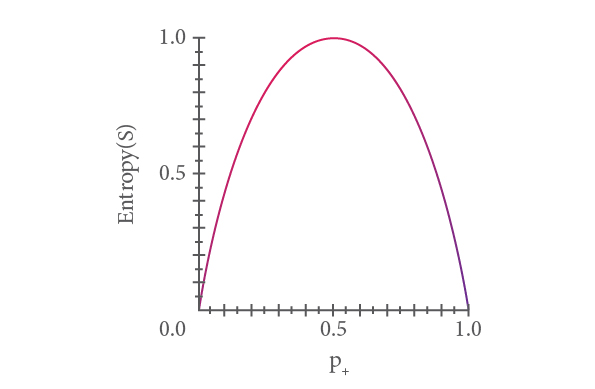

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
هر چه مقدار انتروپی بیشتر باشد ابهام درباره‌ی متغیر تصادفی بیشتر است. در مثال  بالا بیشینه‌ی انتروپی بازای مقدار احتمال ۰.۵ (مثلا یک سکه‌ی متوازن) رخ می‌دهد. هر چقدر به احتمال‌های ۰ یا ۱ نزدیک شویم (سکه نامتوازن‌تر شود) مقدار ابهام کم می‌شود.
<br>
بنابراین طبق آن‌چه گفته شد انتروپی به طور شهودی ابهام موجود در توزیع داده‌ها را به ما نشان‌ می‌دهد. از طرف دیگر اشاره شد که هنگام ساختن گره‌ها باید ویژگی‌ای انتخاب شود که دسته‌بندی داده‌ها براساس آن بیشترین یکدستی را در دسته‌های تولید شده، ایجاد کند. بنابراین یک معیار می‌تواند این باشد که این دسته‌بندی چقدر از انتروپی موجود در داده‌ها کاسته است. به این مقدار بهره‌ی اطلاعاتی گفته می‌شود.
</font></div>

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Entropy(S_v)$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
که در رابطه‌ی بالا S
مجموعه‌ی داده‌ها در گره قبل از تقسیم‌بندی است، A
ویژگی‌ای است که بر اساس آن داده‌ها تقسیم‌بندی می‌شوند.  Values(A)
مقادیر مختلفی است که ویژگی A
می‌تواند داشته باشد و
$S_v$
زیرمجموعه‌ای از S است که ویژگی A در آنها برابر با $v$ است.
<br>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import decomposition as dcmp

حال در زیر توابع لازم از جمله آنتروپی و بهره اطلاعاتی را تکمیل کنید.
از این توابع در تعریف کردن مدل یادگیری و انتخاب بهترین ویژگی استفاده خواهیم کرد.

In [ ]:
# (10 Points)
def entropy(y: pd.Series):
    """
    return the entropy of input
    """
    ########## [Your Code] ##########
    counts = y.value_counts()
    p = counts / len(y)
    H = -sum(p * np.log2(p))

    return H

def information_gain(x: pd.Series, y: pd.Series):
    """
    return the information gain of x
    """
    ########## [Your Code] ##########
    values_A = x.value_counts()
    info_gain = entropy(y)
    for v in values_A.keys():
      Sv = y[x == v]
      info_gain -= (len(Sv)/len(y))*entropy(pd.Series(Sv.values.reshape(-1)))

    return info_gain

def information_gains(X: pd.DataFrame, y: pd.Series):
    """
    return the information gain of all features
    """
    ########## [Your Code] ##########
    info_gains = []
    for col in X.columns:
        info_gains.append(information_gain(X[col], y))

    return info_gains


In [ ]:
y = pd.Series([1,2,1,2,3,1,2,3,1,1,2,3,2,1,4,1,2,3,1,4])
x = pd.Series(['mild','hot','mild','cold','cold','mild','hot','hot','mild','hot','cold','hot','hot','cold','hot','mild','cold','mild','mild','mild'])
information_gain(x,y)
# sv = y[x == 'mild']
# x = x_train[x_train.columns[0]]
# y = y_train
# values_A = x.value_counts()
# for v in values_A.keys():
#   sv = y[x == v]
#   pd.Series(sv.values.reshape(-1))
# a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


0.43436059866170706

<div dir=rtl>
حال در زیر کلاس Node  را تعریف میکنیم که  بیس اصلی مدل ما را تشکیل میدهد .

با استفاده از توابعی که در قسمت قبل نوشتید مدل یادگیری خود را کامل کنید.

In [ ]:
# you can add any variable or function to class if you need.
class Node:
    def __init__(self, depth):
      # Each node in the tree is an instance of class `Node` which is capable of predicting and fitting.
        self.depth = depth
        self.best_feature = ''
        self.children = []
        self.threashold = None
        self.choice = None

    def _is_leaf(self):
        return len(self.children) == 0

    def fit(self, X_train, y_train):
        """
        learn the best_feature and create the children of this node
        - In the `fit` function this node gets features and labels from its father and using information gain decides which feature to use.
         Also based on the decided class it will create its children and call their fit function passing relevant features and labels.
        """
        ########## [Your Code] ##########
        if self.depth == 0 or len(y_train.value_counts()) == 1:
            self.choice = y_train.mode().values[0]
            return

        info_gains = information_gains(X_train, y_train)
        self.best_feature = X_train.columns[np.argmax(info_gains)]
        best_info_gain = max(info_gains)

        if best_info_gain == 0:
            self.choice = y_train.mode().values[0]
            return

        uniques = X_train[self.best_feature].value_counts()
        for value in uniques.keys():
            child = Node(self.depth - 1)
            child.threshold = value
            self.children.append(child)
            child.fit(X_train[X_train[self.best_feature] == value], y_train[X_train[self.best_feature] == value])


    def predict(self, X):
        """
        predicte the class of X based on this node best_feature
        - In the `predict` function this node gets features as input and based on its best_feature decides on this input. If this node is a leaf,
         it will return the decision imediatly and if it's not a leaf, it will return the prediction of its decided child.
        """
        ########## [Your Code] ##########
        if self._is_leaf():
            return self.choice
        else:
            for child in self.children:
                if X[self.best_feature] == child.threshold:
                    return child.predict(X)


###Training & Testing

<div dir=rtl>
حال دیتا ست mnist  را لود کنید و با مدل خود لرن کنید و دقت یادگیری را گزارش دهید.


In [ ]:
#####################################
#            Your Code              #
#####################################
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale data to [0 ,1]
x_train = x_train / 255
x_test = x_test / 255

#reshape data from 28*28 matrix to 784 array
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

# initializing the pca
pca = dcmp.PCA(n_components=10)

# implement pca on our data with 10 component
# select 10 components for train and test data
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

X_train = np.floor(X_train)
X_test = np.floor(X_test)


#convert reduced datasets types to dataframe using pd
x_train=pd.DataFrame(X_train)
x_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [ ]:
def calc_acc(dt : Node, x, y):
    corrects = 0
    for i in range(len(x)):
        if dt.predict(x.iloc[i]) == y_test.iloc[i][0]:
            corrects += 1

    accuracy = corrects / len(x_test)
    print(f"Accuracy: " + str(accuracy*100))
    return accuracy

In [ ]:
accs = []

In [ ]:
dt2 = Node(depth=2)
dt2.fit(x_train, y_train)
accs.append(calc_acc(dt2, x_test, y_test))

Accuracy: 52.94


In [ ]:
dt3 = Node(depth=3)
dt3.fit(x_train, y_train)
accs.append(calc_acc(dt3, x_test, y_test))

Accuracy: 65.32


In [ ]:
dt4 = Node(depth=4)
dt4.fit(x_train, y_train)
accs.append(calc_acc(dt4, x_test, y_test))

Accuracy: 73.78


In [ ]:
dt5 = Node(depth=5)
dt5.fit(x_train, y_train)
accs.append(calc_acc(dt5, x_test, y_test))

Accuracy: 75.77000000000001


In [ ]:
dt6 = Node(depth=6)
dt6.fit(x_train, y_train)
accs.append(calc_acc(dt6, x_test, y_test))

Accuracy: 73.53


In [ ]:
dt7 = Node(depth=7)
dt7.fit(x_train, y_train)
accs.append(calc_acc(dt7, x_test, y_test))

Accuracy: 72.6


In [ ]:
dt8 = Node(depth=8)
dt8.fit(x_train, y_train)
accs.append(calc_acc(dt8, x_test, y_test))

Accuracy: 72.59


In [ ]:
dt9 = Node(depth=9)
dt9.fit(x_train, y_train)
accs.append(calc_acc(dt9, x_test, y_test))

Accuracy: 72.57000000000001


In [ ]:
dt10 = Node(depth=10)
dt10.fit(x_train, y_train)
accs.append(calc_acc(dt10, x_test, y_test))

Accuracy: 72.57000000000001


Text(0, 0.5, 'Accuracy')

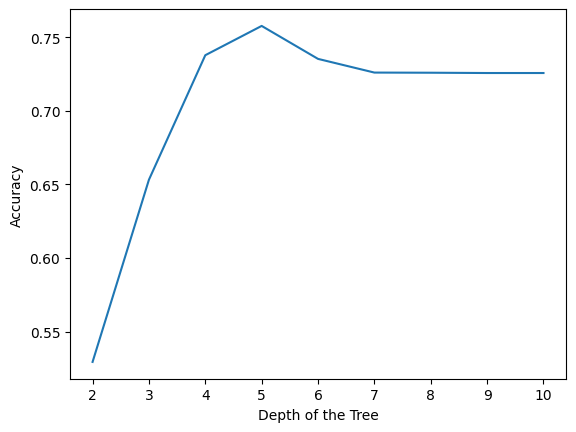

In [ ]:
plt.plot(range(2,11),accs)
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy')

In [ ]:
print("best accuracy occurs at depth of "+str(np.argmax(accs)+2)+" with an accuracy of "+str(np.max(accs)*100)+"%")

best accuracy occurs at depth of 5 with an accuracy of 75.77000000000001%
